# Simple Binary Classification Model for [Project Name] Using Python
## version 02.0
### David Lowe
### May 18, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery (http://machinelearningmastery.com/)

Dataset Used: [Dataset Name]

Dataset ML Model: Binary classification with [numerical | categorical] attributes

Dataset Reference: [Dataset URL]

One source of potential performance benchmarks: [Benchmark URL]

INTRODUCTION: [Sample Paragraph - The dataset involves predicting the onset of diabetes within 5 years given medical details. It is a binary (2-class) classification problem. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values.]

CONCLUSION: [Sample Paragraph - The baseline performance of predicting the class variable achieved an average accuracy of 75.85%. The top accuracy result achieved via Logistic Regression was 77.73% after a series of tuning trials. The ensemble algorithms, in this case, did not yield a better result than the non-ensemble algorithms to justify the additional processing required.]

The purpose of this project is to analyze predictions using various machine learning algorithms and to document the steps using a template. Working through machine learning problems from end-to-end requires a structured modeling approach. Working problems through a project template can also encourage us to think about the problem more critically, to challenge our assumptions, and to get proficient at all parts of a modeling project.

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem
### 1.a) Load ibraries

In [32]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [33]:
startTimeScript = datetime.now()

inputFile = 'pima-indians-diabetes.data.csv'
colNames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'targetVar']
entireDataset = read_csv(inputFile, names=colNames)

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [34]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [35]:
set_option('display.width', 100)
print(entireDataset.head(20))

    preg  plas  pres  skin  test  mass   pedi  age  targetVar
0      6   148    72    35     0  33.6  0.627   50          1
1      1    85    66    29     0  26.6  0.351   31          0
2      8   183    64     0     0  23.3  0.672   32          1
3      1    89    66    23    94  28.1  0.167   21          0
4      0   137    40    35   168  43.1  2.288   33          1
5      5   116    74     0     0  25.6  0.201   30          0
6      3    78    50    32    88  31.0  0.248   26          1
7     10   115     0     0     0  35.3  0.134   29          0
8      2   197    70    45   543  30.5  0.158   53          1
9      8   125    96     0     0   0.0  0.232   54          1
10     4   110    92     0     0  37.6  0.191   30          0
11    10   168    74     0     0  38.0  0.537   34          1
12    10   139    80     0     0  27.1  1.441   57          0
13     1   189    60    23   846  30.1  0.398   59          1
14     5   166    72    19   175  25.8  0.587   51          1
15     7

#### 2.a.ii) Dimensions of the dataset.

In [36]:
print(entireDataset.shape)

(768, 9)


#### 2.a.iii) Types of the attributes.

In [37]:
print(entireDataset.dtypes)

preg           int64
plas           int64
pres           int64
skin           int64
test           int64
mass         float64
pedi         float64
age            int64
targetVar      int64
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [38]:
print(entireDataset.describe())

             preg        plas        pres        skin        test        mass        pedi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578    0.471876   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160    0.331329   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.078000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000    0.243750   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000    0.372500   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000    0.626250   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000    2.420000   

              age   targetVar  
count  768.000000  768.000000  
mean    33.240885    0.348958  
std     11.760232    0.476951  
min     21.000000    0.000000  
25

#### 2.a.v) Summarize the levels of the class attribute.

In [39]:
print(entireDataset.groupby('targetVar').size())

targetVar
0    500
1    268
dtype: int64


#### 2.a.v) Count missing values.

In [40]:
print(entireDataset.isnull().sum())

preg         0
plas         0
pres         0
skin         0
test         0
mass         0
pedi         0
age          0
targetVar    0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [41]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

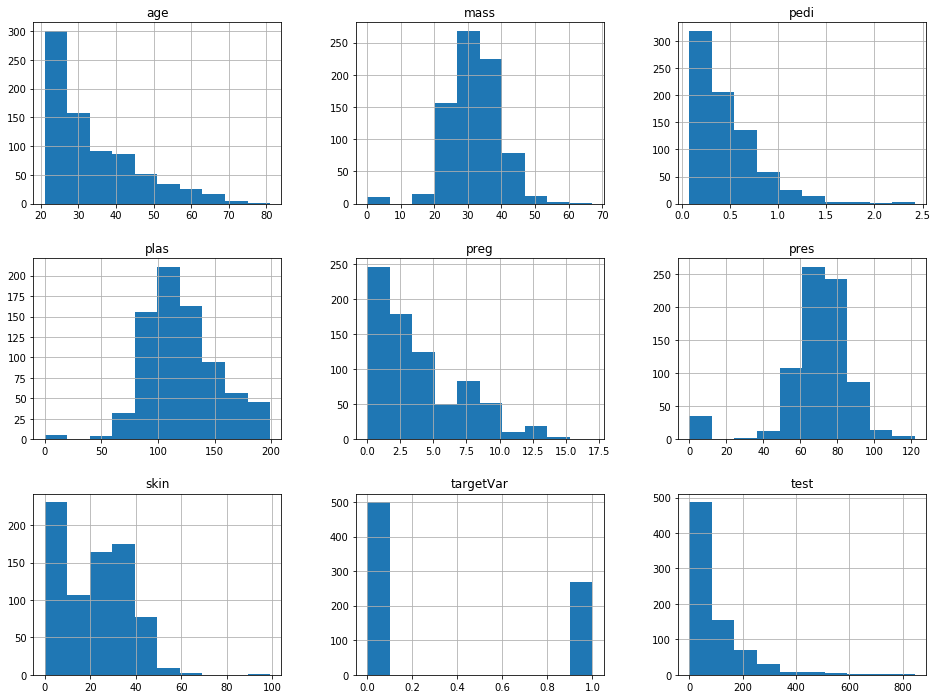

In [42]:
# Histograms for each attribute
entireDataset.hist()
pyplot.show()

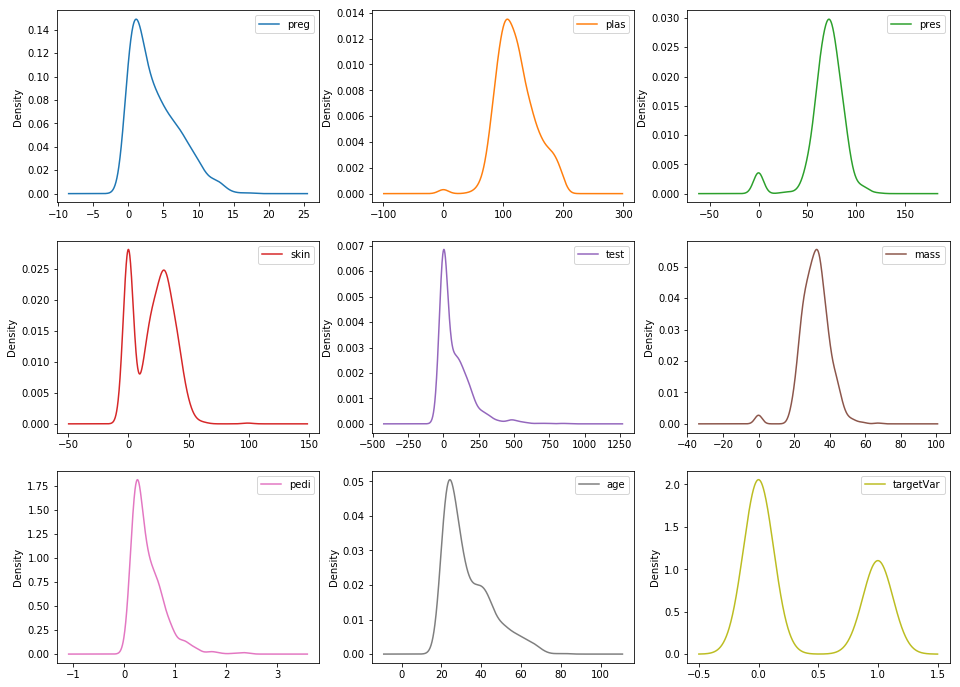

In [43]:
# Density plot for each attribute
entireDataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
pyplot.show()

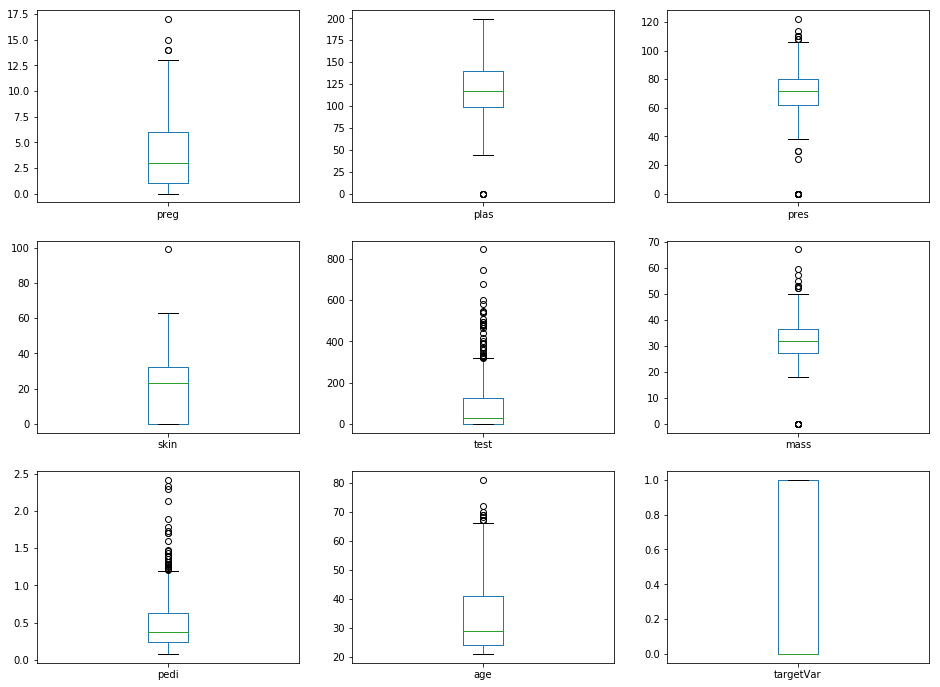

In [44]:
# Box and Whisker plot for each attribute
entireDataset.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

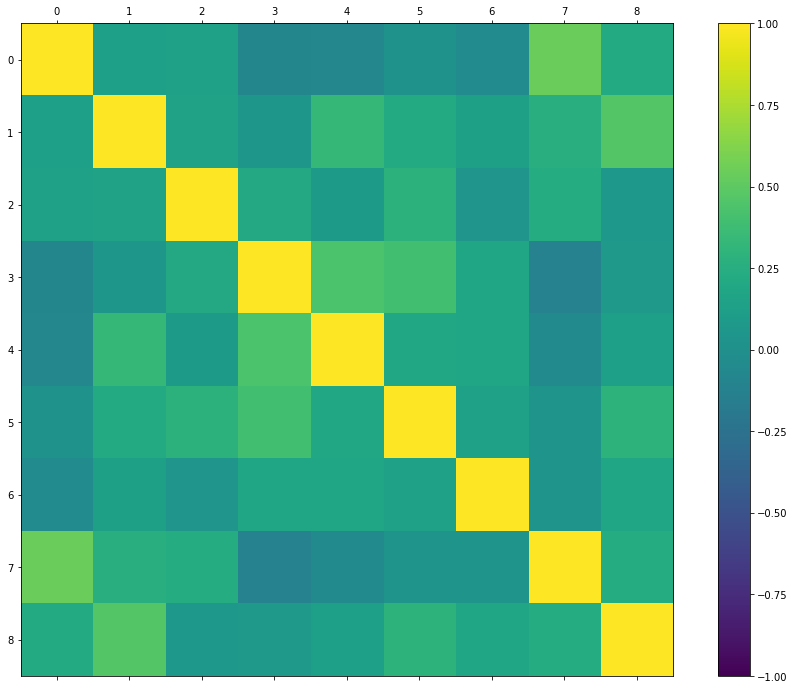

In [45]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

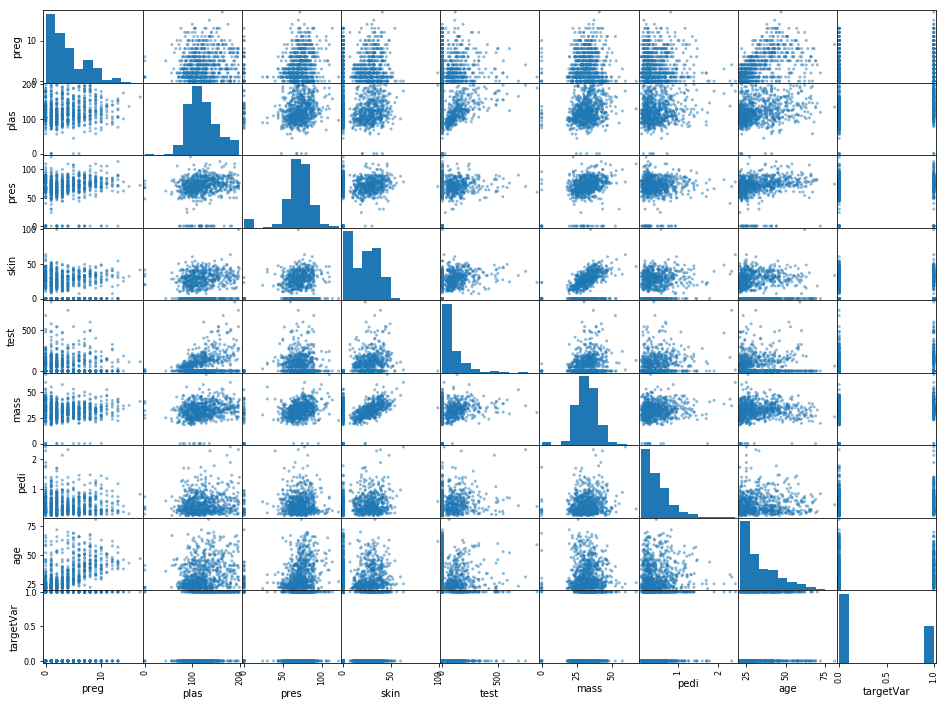

In [46]:
# Scatterplot matrix
scatter_matrix(entireDataset)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [47]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [48]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [49]:
# Not applicable for this iteration of the project.

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [50]:
seedNum = 88
array = entireDataset.values
X_entire = array[:,0:totAttr]
Y_entire = array[:,totAttr]
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

Total time for data handling and visualization: 0:00:09.600336


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Logistic Regression

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [51]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [52]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('BT', BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
results = []
names = []

In [53]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))

LR: 0.763617 (0.047909)
Model training time: 0:00:00.102993
CART: 0.692094 (0.056292)
Model training time: 0:00:00.031250
NB: 0.755658 (0.048868)
Model training time: 0:00:00.021903
KNN: 0.687070 (0.058557)
Model training time: 0:00:00.030982
SVM: 0.643390 (0.049706)
Model training time: 0:00:00.274852
BT: 0.729640 (0.050446)
Model training time: 0:00:00.304742
RF: 0.744315 (0.039755)
Model training time: 0:00:00.221685
ET: 0.715045 (0.036187)
Model training time: 0:00:00.172536
AB: 0.740799 (0.051179)
Model training time: 0:00:00.906783
GBM: 0.745717 (0.054651)
Model training time: 0:00:00.812756


### 4.b) Spot-checking baseline algorithms

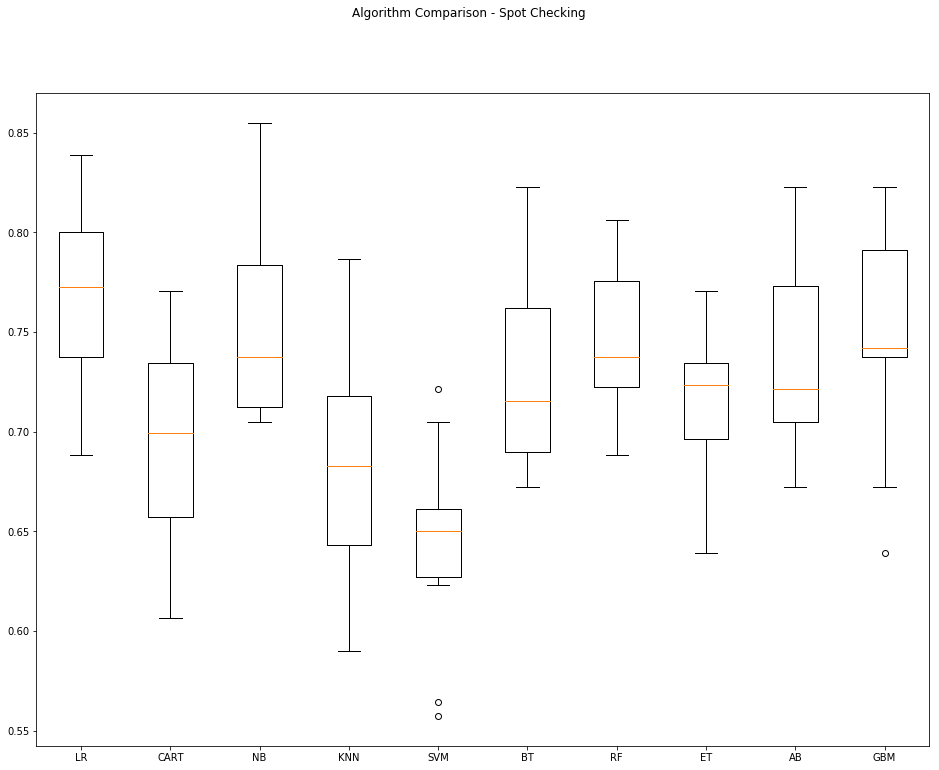

In [54]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [55]:
# Set up the comparison array
results = []
names = []

In [56]:
# Tuning algorithm #1 - Logistic Regression
# Logistic Regression does not require any special tuning parameters
startTimeModule = datetime.now()
model1 = LogisticRegression(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model1, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('LR')
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.052112


In [57]:
# Tuning algorithm #2 - Random Forest
startTimeModule = datetime.now()
paramGrid2 = dict(n_estimators=numpy.array([10,25,50,100,200]))
model2 = RandomForestClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('RF')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.763844 using {'n_estimators': 50}
0.739414 (0.050054) with: {'n_estimators': 10}
0.757329 (0.042348) with: {'n_estimators': 25}
0.763844 (0.037875) with: {'n_estimators': 50}
0.754072 (0.046531) with: {'n_estimators': 100}
0.750814 (0.048413) with: {'n_estimators': 200}
Model training time: 0:00:06.140420


In [58]:
# Tuning algorithm #3 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
print ('Model training time:',(datetime.now() - startTimeModule))
paramGrid3 = dict(n_estimators=numpy.array([10,25,50,100,200]))
model3 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00
Best: 0.752443 using {'n_estimators': 25}
0.744300 (0.069686) with: {'n_estimators': 10}
0.752443 (0.049241) with: {'n_estimators': 25}
0.749186 (0.045178) with: {'n_estimators': 50}
0.747557 (0.054100) with: {'n_estimators': 100}
0.741042 (0.054277) with: {'n_estimators': 200}
Model training time: 0:00:03.335619


### 5.b) Compare Algorithms After Tuning

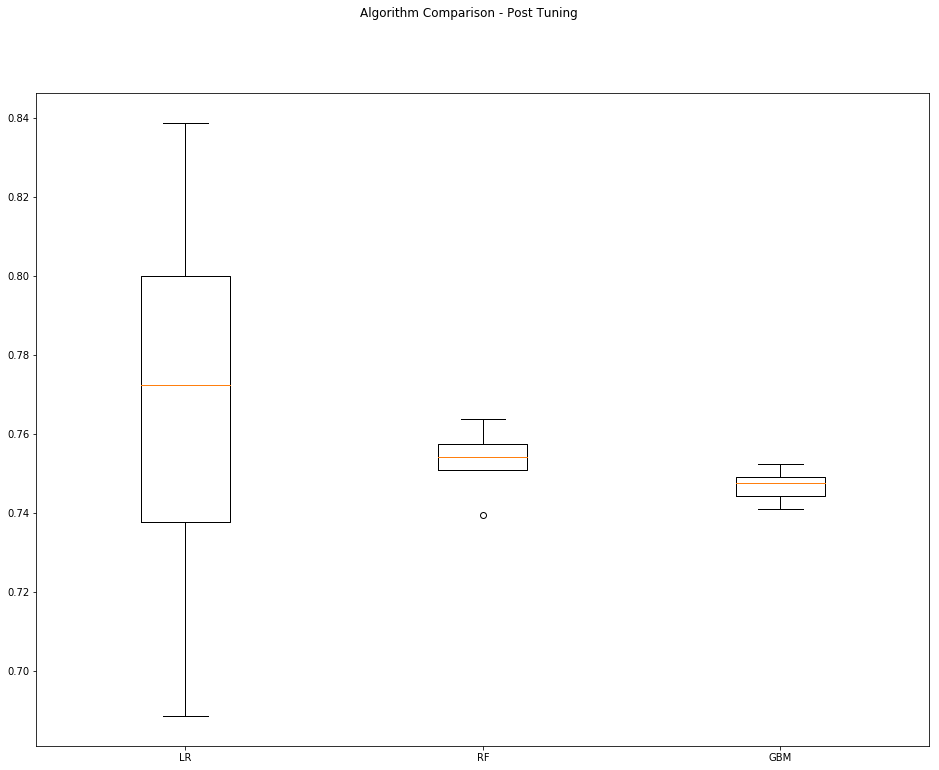

In [59]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [60]:
model = RandomForestClassifier(n_estimators=50, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7792207792207793
[[90 15]
 [19 30]]
             precision    recall  f1-score   support

        0.0       0.83      0.86      0.84       105
        1.0       0.67      0.61      0.64        49

avg / total       0.78      0.78      0.78       154



### 6.b) Create standalone model on entire training dataset

In [61]:
startTimeModule = datetime.now()
finalModel = RandomForestClassifier(n_estimators=50)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:00.105121


### 6.c) Save model for later use

In [62]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:00:23.057260
